# Breakout Screener

This notebook screens for breakouts from a universe cryptoasset spot and/or perp futures prices.

In [36]:
import pandas as pd
import numpy as np

from cryptodatapy.extract.datarequest import DataRequest
from cryptodatapy.extract.getdata import GetData

from factorlab.factors.trend import Trend
from factorlab.feature_engineering.transform import Transform

## Get Binace Spot and Perp Tickers 
- Pull perpetual futures tickers from Binance and Binance USDM exchange.

In [17]:
data_req = DataRequest()

In [18]:
bin_spot_tickers = GetData(data_req).get_meta(method='get_assets_info', exch='binance', as_list=True)

In [19]:
len(bin_spot_tickers)

562

In [20]:
bin_perp_tickers = GetData(data_req).get_meta(method='get_assets_info', exch='binanceusdm', as_list=True)

In [21]:
len(bin_perp_tickers)

256

## Pull Spot OHLCV Prices
- Pull spot OHLCV prices from CryptoCompare for all coins traded on Binance USDM exchange (perp futures).
- Filter data to remove outliers and errors.

In [22]:
start = pd.Timestamp.now()

In [23]:
# pull OHLC from Binance
data_req = DataRequest(source='ccxt',
                       tickers=bin_spot_tickers, 
                       fields=['open', 'high', 'low', 'close', 'volume'], 
                       freq='d')

In [24]:
spot_df = GetData(data_req).get_series()

In [25]:
# pull OHLC from Binance
data_req = DataRequest(source='ccxt',
                       tickers=bin_perp_tickers, 
                       fields=['open', 'high', 'low', 'close', 'volume'], 
                       freq='d')

In [26]:
perp_df = GetData(data_req).get_series()

In [27]:
pd.Timestamp.now() - start

Timedelta('0 days 00:21:23.276604')

##  Compute Breakout Signal

- **Breakout signal**: prices makign new highs or new lows over an n-period lookback window

In [28]:
# breakout signals
breakout_5d_df = Trend(spot_df, vwap=True, log=True, lookback=5).breakout()
breakout_10d_df = Trend(spot_df, vwap=True, log=True, lookback=10).breakout()
breakout_15d_df = Trend(spot_df, vwap=True, log=True, lookback=15).breakout()
breakout_20d_df = Trend(spot_df, vwap=True, log=True, lookback=20).breakout()
breakout_30d_df = Trend(spot_df, vwap=True, log=True, lookback=30).breakout()
breakout_45d_df = Trend(spot_df, vwap=True, log=True, lookback=45).breakout()
breakout_90d_df = Trend(spot_df, vwap=True, log=True, lookback=90).breakout()
breakout_180d_df = Trend(spot_df, vwap=True, log=True, lookback=180).breakout()

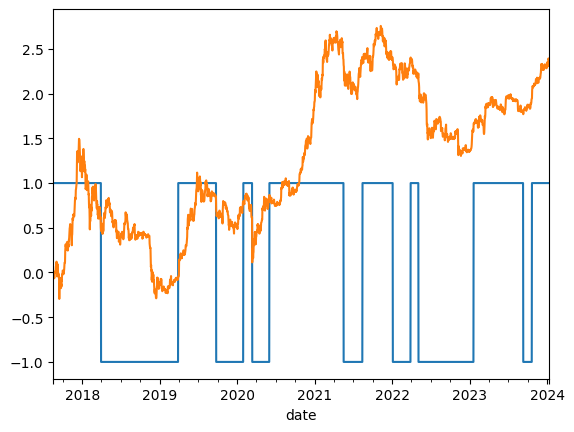

In [29]:
# plot BTC breakout signal
breakout_90d_df.unstack().vwap['BTC'].plot()
np.log(spot_df.unstack().close['BTC']).diff().cumsum().plot();

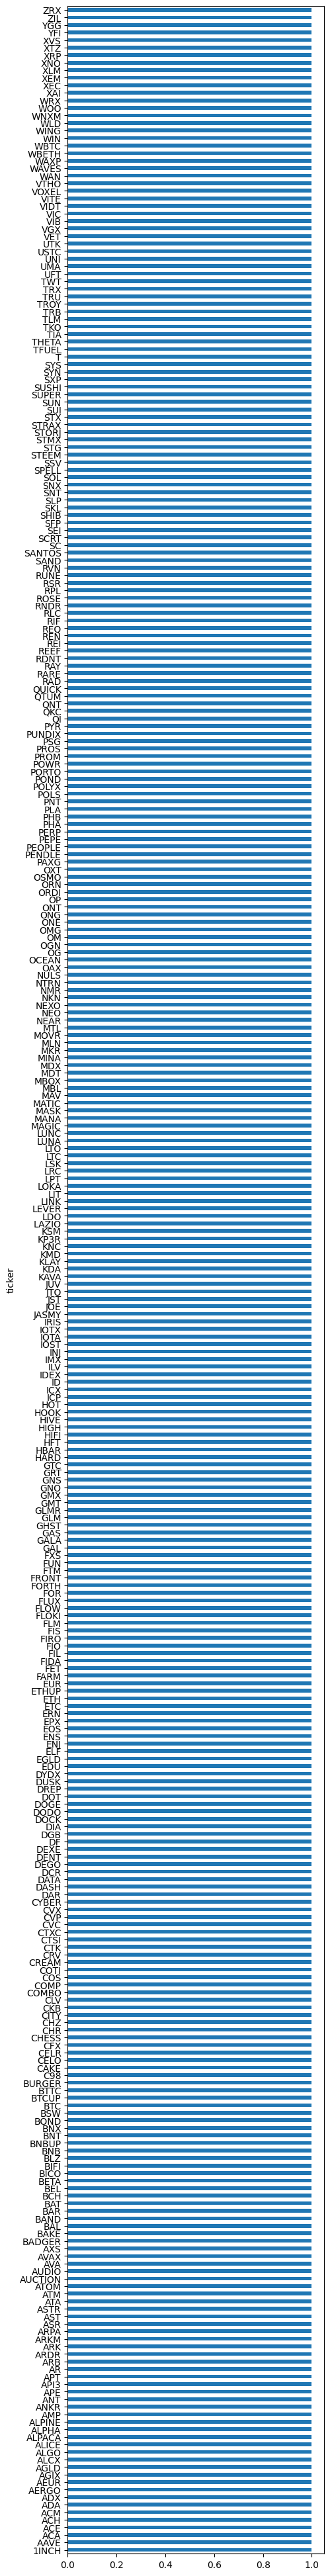

In [30]:
# longs
breakout_90d_df.vwap.unstack().iloc[-1][breakout_90d_df.unstack().vwap.iloc[-1] == 1].plot(kind='barh', figsize=(5,50));

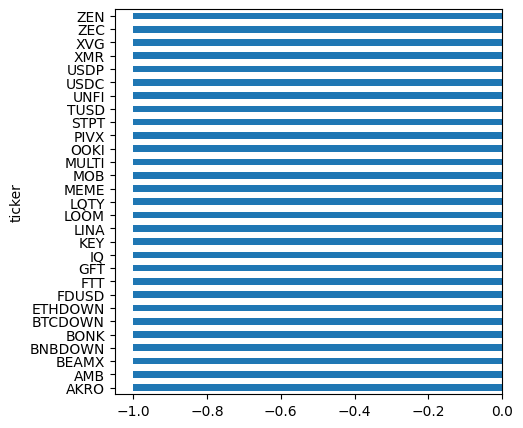

In [31]:
# shorts
breakout_90d_df.vwap.unstack().iloc[-1][breakout_90d_df.unstack().vwap.iloc[-1] == -1].plot(kind='barh', figsize=(5,5));

In [32]:
# TODO
# create volume expansion measure for breakout expansion